In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import time

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Split training into 40,000 training and 10,000 validation
x_train, x_val = x_train[:40000], x_train[40000:]
y_train, y_val = y_train[:40000], y_train[40000:]

# Shuffle the training data using NumPy
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

In [ ]:
class LearningRateTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        self.lr_history = []

    def on_batch_end(self, batch, logs=None):
        # Get the current learning rate from the schedule
        lr = self.model.optimizer.learning_rate
        self.lr_history.append(lr)

In [ ]:
class StepSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, stepValue ,initial_learning_rate = 0.1):
        self.initial_learning_rate = initial_learning_rate
        self.stepValue = stepValue

    def __call__(self, step):
        return self.initial_learning_rate - self.stepValue * step

initial_lr = 0.1
final_lr = 0.001
steps = 12500
step_value = (initial_lr - final_lr ) / steps

lr_schedule = StepSchedule(stepValue = step_value)

In [ ]:
# Create a simple model (example with CIFAR-10 dataset)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy', #labels are integers
              metrics=['accuracy'])

In [ ]:
lr_tracker = LearningRateTracker()

start_time = time.time()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks = [lr_tracker]
)

end_time = time.time()

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2106 - loss: 2.1498 - val_accuracy: 0.2532 - val_loss: 2.0186
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3070 - loss: 1.8921 - val_accuracy: 0.3169 - val_loss: 1.8861
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3438 - loss: 1.8189 - val_accuracy: 0.3359 - val_loss: 1.8842
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3626 - loss: 1.7731 - val_accuracy: 0.3755 - val_loss: 1.7449
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3764 - loss: 1.7291 - val_accuracy: 0.3925 - val_loss: 1.7092
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3968 - loss: 1.6876 - val_accuracy: 0.4019 - val_loss: 1.6896
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4083 - loss: 1.6535 - val_accuracy: 0.4180 - val_loss: 1.6468
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4238 - loss: 1.6251 - val_accuracy: 0.

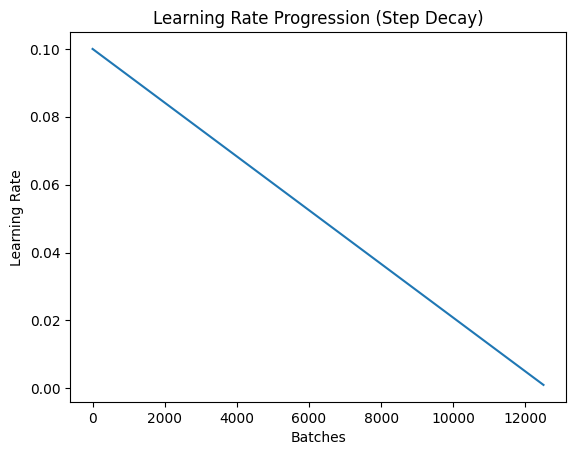

In [ ]:
# Plot the learning rate history
plt.plot(lr_tracker.lr_history)
plt.title('Learning Rate Progression (Step Decay)')
plt.xlabel('Batches')
plt.ylabel('Learning Rate')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


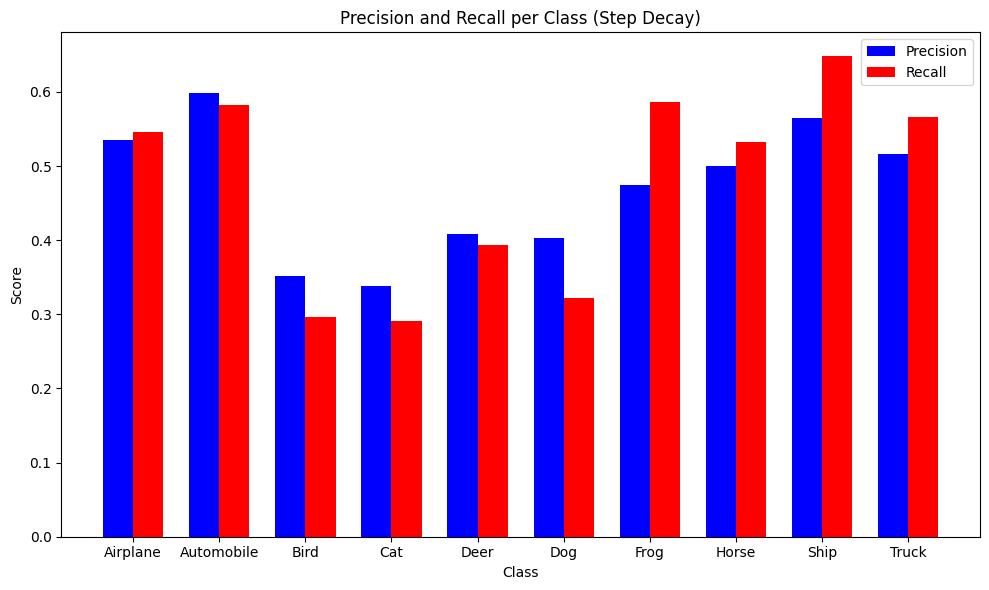

In [ ]:
# Evaluate on test data

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Get predictions (class indices)
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=-1)

# Calculate precision for each class using scikit-learn
precision_per_class = precision_score(y_test, predicted_labels, average=None)

# Calculate recall for each class
recall_per_class = recall_score(y_test, predicted_labels, average=None)

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Number of classes
num_classes = len(np.unique(y_test))

# Plotting precision and recall
x = np.arange(num_classes)  # the class labels

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # width of the bars

# Plot precision bars
ax.bar(x - width/2, precision_per_class, width, label='Precision', color='b')

# Plot recall bars
ax.bar(x + width/2, recall_per_class, width, label='Recall', color='r')

# Adding labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision and Recall per Class (Step Decay)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

Training time: 59.13382363319397 seconds


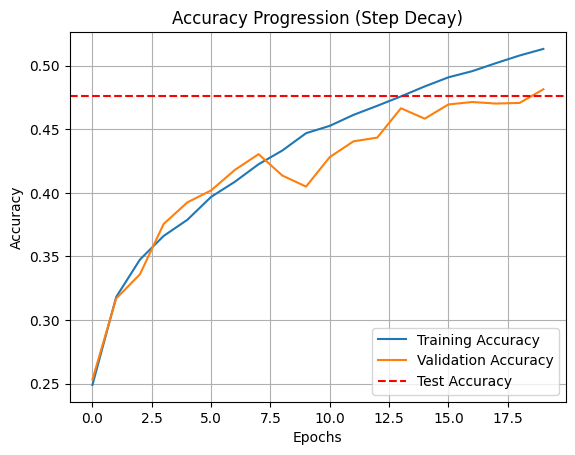

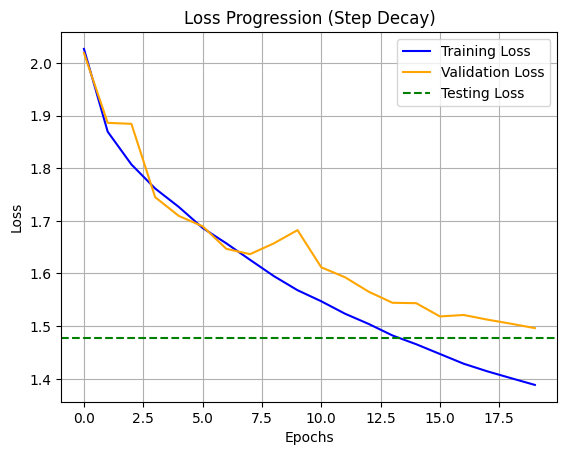

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


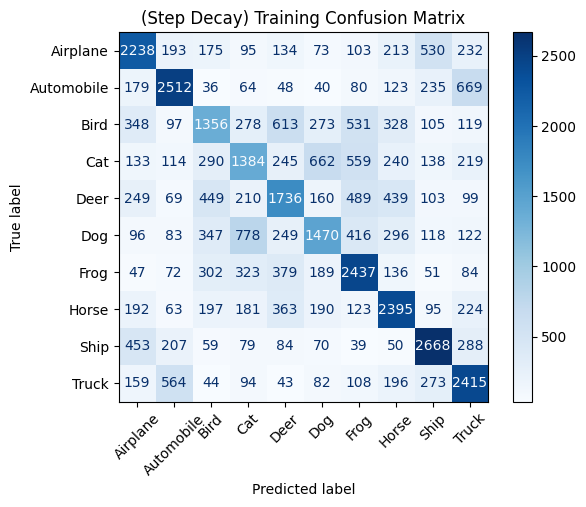

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


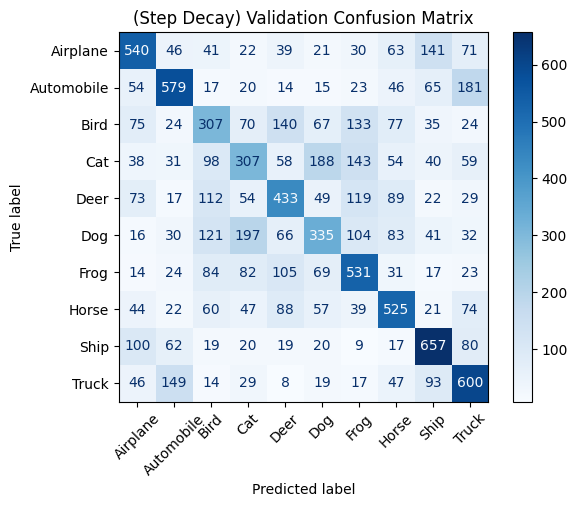

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


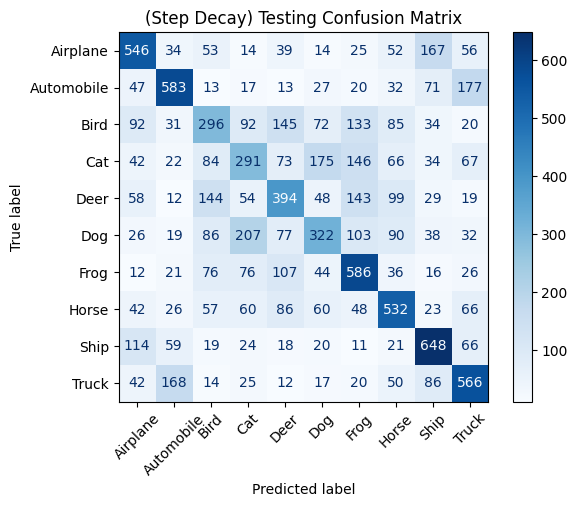

In [ ]:
# Calculate the total training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Visualize training, validation, and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy Progression (Step Decay)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plotting Training, Testing, and Validation Loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
# Assuming testing loss is stored separately in a variable `test_loss`
plt.axhline(y=test_loss, color='green', linestyle='--', label='Testing Loss')

plt.title('Loss Progression (Step Decay)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Helper function to plot confusion matrices
def plot_confusion_matrix(data, labels, dataset_name):
    predictions = model.predict(data, batch_size=64)
    predicted_classes = np.argmax(predictions, axis=1)
    cm = confusion_matrix(labels, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.show()

# Plot confusion matrices for training, validation, and testing
plot_confusion_matrix(x_train, y_train, '(Step Decay) Training')
plot_confusion_matrix(x_val, y_val, '(Step Decay) Validation')
plot_confusion_matrix(x_test, y_test, '(Step Decay) Testing')